In [1]:
### Imports ###
from nntomo.network import nnfbp_training
from nntomo.nnfbp import DatasetNNFBP
from nntomo.projection_stack import ProjectionStack
from nntomo.utilities import get_MSE_loss
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
mode = 'haadf'
min_eps_var = 0.01

### Training data

For the training dataset, simulated STEM projections fo different MOF structures are taken for the inputs and the SIRT reconstruction with 144 projections is used for the real output values. The selected MOF structures are: MOF-5, PCN-61, IRMOF-76, ZIF-4 and MOF-1131.

In [3]:
training_mofs = ['MOF-5', 'PCN-61', 'IRMOF-76', 'ZIF-4', 'MOF-1131']
cell_repetitions = [3, 2, 2, 5, 3] # Chosen so that the number of voxels along the first axis is roughly the same

training_stacks = []

for mof, cell_repetition in zip(training_mofs, cell_repetitions):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(
        cif_file,
        Nth=144,
        angles_range='full',
        mode=mode,
        padding=True,
        cell_repetition=(cell_repetition,cell_repetition,1),
        #gaussian_filter=.3,
        #dose_per_area_noise=100,
        #nb_frozen_phonons=4,
        )
    projections.save()
    training_stacks.append(projections.get_resized_proj(512))

Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\MOF-5-331-haadf144proj-padd.mrc.
 ID: MOF-5-331-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\PCN-61-221-haadf144proj-padd.mrc.
 ID: PCN-61-221-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\IRMOF-76-221-haadf144proj-padd.mrc.
 ID: IRMOF-76-221-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\ZIF-4-551-haadf144proj-padd.mrc.
 ID: ZIF-4-551-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstru

In [4]:
# SIRT reference reconstructions

training_reconstructions = []

for mof, cell_repetition in zip(training_mofs, cell_repetitions):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(
        cif_file,
        Nth=144,
        angles_range='full',
        mode=mode,
        padding=True,
        cell_repetition=(cell_repetition,cell_repetition,1),
        #gaussian_filter=.3,
        #dose_per_area_noise=100,
        #nb_frozen_phonons=4,
        )
    projections.save()
    sirt_rec = projections.get_resized_proj(512).get_SIRT_reconstruction(min_eps_var = min_eps_var, print_n_iter=True)
    sirt_rec.save()
    training_reconstructions.append(sirt_rec)

Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\MOF-5-331-haadf144proj-padd.mrc.
 ID: MOF-5-331-haadf144proj-padd
SIRT reconstruction computed with 74 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_MOF-5-331-haadf144proj-padd-resized512.mrc.
 ID: sirt_MOF-5-331-haadf144proj-padd-resized512
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\PCN-61-221-haadf144proj-padd.mrc.
 ID: PCN-61-221-haadf144proj-padd
SIRT reconstruction computed with 54 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_PCN-61-221-haadf144proj-padd-resize

### Validation data

For the validation dataset, simulated STEM projections fo different MOF structures are taken for the inputs and the SIRT reconstruction with 144 projections is used for the real output values. The selected MOF structures are: UiO-66, MIL-53 and MOF-1115.

In [5]:
### Structure for NN training - MOF: projections ###

validation_mofs = ['UiO-66', 'MIL-53', 'MOF-1115']
cell_repetitions = [4, 5, 2] # Chosen so that the number of voxels along the first axis is roughly the same

validation_stacks = []

for mof, cell_repetition in zip(validation_mofs, cell_repetitions):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(
        cif_file,
        Nth=144,
        angles_range='full',
        mode=mode,
        padding=True,
        cell_repetition=(cell_repetition,cell_repetition,1),
        #gaussian_filter=.3,
        #dose_per_area_noise=100,
        #nb_frozen_phonons=4,
        )
    projections.save()
    validation_stacks.append(projections.get_resized_proj(512))

Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\UiO-66-441-haadf144proj-padd.mrc.
 ID: UiO-66-441-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\MIL-53-551-haadf144proj-padd.mrc.
 ID: MIL-53-551-haadf144proj-padd
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\MOF-1115-221-haadf144proj-padd.mrc.
 ID: MOF-1115-221-haadf144proj-padd


In [6]:
# SIRT reconstructions

validation_reconstructions = []

for mof, cell_repetition in zip(validation_mofs, cell_repetitions):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(
        cif_file,
        Nth=144,
        angles_range='full',
        mode=mode,
        padding=True,
        cell_repetition=(cell_repetition,cell_repetition,1),
        #gaussian_filter=.3,
        #dose_per_area_noise=100,
        #nb_frozen_phonons=4,
        )
    projections.save()
    sirt_rec = projections.get_resized_proj(512).get_SIRT_reconstruction(min_eps_var = min_eps_var, print_n_iter=True)
    sirt_rec.save()
    validation_reconstructions.append(sirt_rec)


Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\UiO-66-441-haadf144proj-padd.mrc.
 ID: UiO-66-441-haadf144proj-padd
SIRT reconstruction computed with 36 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-66-441-haadf144proj-padd-resized512.mrc.
 ID: sirt_UiO-66-441-haadf144proj-padd-resized512
Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\MIL-53-551-haadf144proj-padd.mrc.
 ID: MIL-53-551-haadf144proj-padd
SIRT reconstruction computed with 57 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_MIL-53-551-haadf144proj-padd-re

### Test data

We test the reconstruction algorithms on UiO-67.

In [7]:
# Stack to reconstruct
uio67_stack = ProjectionStack.from_cif_file(
    "data/cif_files/UiO-67.cif",
    Nth=144,
    angles_range='full',
    mode = mode,
    padding=True,
    cell_repetition= (3,3,1),
    #gaussian_filter=.3,
    #dose_per_area_noise=100,
    # #nb_frozen_phonons = 4,
    )
uio67_stack.save()
uio67_stack = uio67_stack.get_resized_proj(512)

Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\UiO-67-331-haadf144proj-padd.mrc.
 ID: UiO-67-331-haadf144proj-padd


In [8]:
# Reference reconstruction (144 projs)
uio67_perfect_stack = ProjectionStack.from_cif_file(
    "data/cif_files/UiO-67.cif",
    Nth=144,
    angles_range='full',
    mode = mode,
    padding=True,
    cell_repetition= (3,3,1),
    #gaussian_filter=.3,
    #dose_per_area_noise=100,
    # #nb_frozen_phonons = 4,
    )
uio67_perfect_stack.save()
sirt144_reconstruction = uio67_perfect_stack.get_resized_proj(512).get_SIRT_reconstruction(min_eps_var = min_eps_var, print_n_iter=True)
sirt144_reconstruction.save()

Saving projections...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\projection_files\UiO-67-331-haadf144proj-padd.mrc.
 ID: UiO-67-331-haadf144proj-padd
SIRT reconstruction computed with 62 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512


### Networks training

In [9]:
subsets = [144,72,48,36,24,18,16,12,9,8,6,4,1]
tem_subsets = [113, 57, None, 29, None, 15, None, None, 8, None, None, None, None]

In [10]:
# Training of NNFBP networks

trained_networks_nnfbp = []

for subset in subsets:
    # subsets
    training_stacks_sub = [stack.get_proj_subset(subset) for stack in training_stacks]
    validation_stack_sub = [stack.get_proj_subset(subset) for stack in validation_stacks]

    # training
    training_dataset = DatasetNNFBP(training_stacks_sub, training_reconstructions)
    validation_dataset = DatasetNNFBP(validation_stack_sub, validation_reconstructions)

    network = nnfbp_training(training_dataset, validation_dataset, 8, max_epoch=100)
    trained_networks_nnfbp.append(network)

Epoch 101 (n=6) | Best avg MSELoss(): 0.000169 | End of training                                 
Epoch 42 (n=25) | Best avg MSELoss(): 0.000457 | End of training                                 
Epoch 101 (n=23) | Best avg MSELoss(): 0.000172 | End of training                                 
Epoch 51 (n=25) | Best avg MSELoss(): 0.000487 | End of training                                 
Epoch 41 (n=25) | Best avg MSELoss(): 0.000491 | End of training                                 
Epoch 47 (n=25) | Best avg MSELoss(): 0.000643 | End of training                                 
Epoch 46 (n=25) | Best avg MSELoss(): 0.000265 | End of training                                 
Epoch 99 (n=25) | Best avg MSELoss(): 0.000303 | End of training                                 
Epoch 39 (n=25) | Best avg MSELoss(): 0.000556 | End of training                                 
Epoch 88 (n=25) | Best avg MSELoss(): 0.000453 | End of training                                 
Epoch 63 (n=25) | B

In [11]:
# MSE of NNFBP reconstructions

mse_nnfbp = []
mse_nnfbp_tem = []

for subset, tem_subset, network in zip(subsets, tem_subsets, trained_networks_nnfbp):

    uio67_stack_sub = uio67_stack.get_proj_subset(subset)
    nn_rec = uio67_stack_sub.get_NNFBP_reconstruction(network, show_progressbar=False)
    nn_rec.save()
    mse_nnfbp.append(get_MSE_loss(sirt144_reconstruction, nn_rec, only_inscribed_disc=True))

    if tem_subset is not None:
        uio67_stack_sub = uio67_stack.convert_full_tem().get_proj_subset(tem_subset)
        nn_rec = uio67_stack_sub.get_NNFBP_reconstruction(network, show_progressbar=False)
        nn_rec.save()
        mse_nnfbp_tem.append(get_MSE_loss(sirt144_reconstruction, nn_rec, only_inscribed_disc=True))

Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\nnfbp[MOF-5-331-haadf144proj-padd-resized512-sub144][sirt_MOF-5-331-haadf144proj-padd-resized512]bin8h_UiO-67-331-haadf144proj-padd-resized512-sub144.mrc.
 ID: nnfbp[MOF-5-331-haadf144proj-padd-resized512-sub144][sirt_MOF-5-331-haadf144proj-padd-resized512]bin8h_UiO-67-331-haadf144proj-padd-resized512-sub144
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\nnfbp[MOF-5-331-haadf144proj-padd-resized512-sub144][sirt_MOF-5-331-haadf144proj-padd-resized512]bin8h_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub113.mrc.
 ID: nnfbp[MOF-5-331-haadf144proj-padd-resized512-sub144][sirt_MOF-5-331-haadf144proj-padd-resized512]bin8h_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub113
Saving volume...
File saved at c:\Users\Admin-tomo\Doc

In [12]:
# MSE of SIRT

mse_sirt = []
for subset in subsets:
    uio67_stack_sub = uio67_stack.get_proj_subset(subset)

    sirt_rec = uio67_stack_sub.get_SIRT_reconstruction(min_eps_var = min_eps_var, print_n_iter=True)
    sirt_rec.save()
    mse_sirt.append(get_MSE_loss(sirt144_reconstruction, sirt_rec, only_inscribed_disc=True))
    print(mse_sirt[-1])

SIRT reconstruction computed with 62 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-sub144.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-sub144
0.0
SIRT reconstruction computed with 62 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-sub72.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-sub72
1.12185477921245e-12
SIRT reconstruction computed with 65 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-sub48.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-sub48
2.26385642003446e-12
SIRT recon

In [22]:
# MSE of SIRT

mse_sirt_tem = []

for tem_subset in [tem_subset for tem_subset in tem_subsets if tem_subset is not None]:
    uio67_stack_sub = uio67_stack.convert_full_tem().get_proj_subset(tem_subset)

    sirt_rec = uio67_stack_sub.get_SIRT_reconstruction(min_eps_var = min_eps_var, print_n_iter=True)
    sirt_rec.save()
    mse_sirt_tem.append(get_MSE_loss(sirt144_reconstruction, sirt_rec, only_inscribed_disc=True))

Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub113.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub113
SIRT reconstruction computed with 73 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub57.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub57
SIRT reconstruction computed with 71 iterations.
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub29.mrc.
 ID: sirt_UiO-67-331-haadf144proj-padd-resized512-subtem113-sub29
SIRT reconstruction computed with 59 iteratio

### Plots

[0.0, 1.12185477921245e-12, 2.26385642003446e-12, 3.4900580689334326e-12, 5.101644367372371e-12, 7.6327364567641e-12, 7.346129780871902e-12, 8.982676581725801e-12, 1.2053866585426398e-11, 1.1939705300834103e-11, 1.5014878229635542e-11, 1.4434778025651518e-11, 2.1926222990020783e-11]


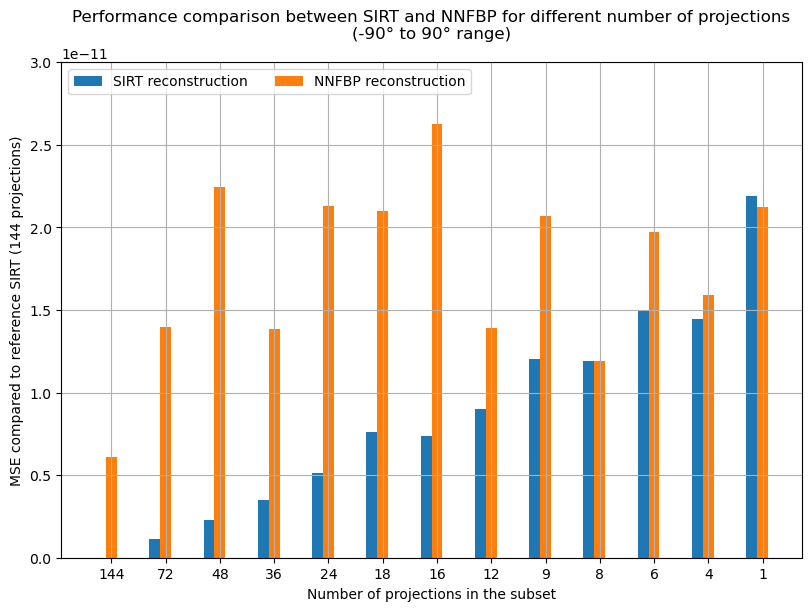

In [21]:
# MSE SIRT against MSE NNFBP
print(mse_sirt)

mse_lists = {
    'SIRT reconstruction': mse_sirt,
    'NNFBP reconstruction': mse_nnfbp,
#    'MSE MSDNET': mse_msdnet,
}

x = np.arange(len(mse_sirt))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (8,6))

for attribute, measurement in mse_lists.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Number of projections in the subset")
ax.set_ylabel('MSE compared to reference SIRT (144 projections)')
ax.set_title('Performance comparison between SIRT and NNFBP for different number of projections\n(-90° to 90° range)')
ax.set_xticks(x + width, subsets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.3e-10)
ax.grid()
plt.show()

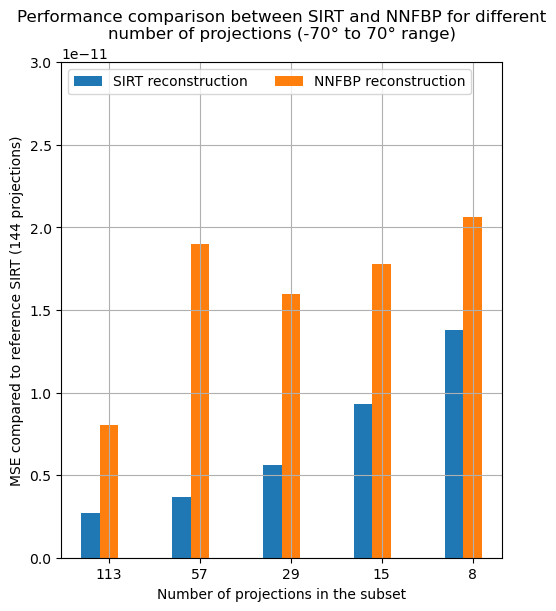

In [24]:
# MSE SIRT against MSE NNFBP
mse_lists = {
    'SIRT reconstruction': mse_sirt_tem,
    'NNFBP reconstruction': mse_nnfbp_tem,
#    'MSE MSDNET': mse_msdnet,
}

x = np.arange(len(mse_sirt_tem))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (5,6))

for attribute, measurement in mse_lists.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Number of projections in the subset")
ax.set_ylabel('MSE compared to reference SIRT (144 projections)')
ax.set_title('Performance comparison between SIRT and NNFBP for different\nnumber of projections (-70° to 70° range)')
ax.set_xticks(x + width, [tem_subset for tem_subset in tem_subsets if tem_subset is not None])
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.3e-10)
ax.grid()
plt.show()